# Figure generation

In [1]:
from IPython.display import Image, display, SVG
import svgutils.transform as sg
import numpy as np
from lxml import etree

In [2]:
# Directory of output figures
output_directory = "output/"

## Figure 1

In [3]:
panel_a = (
    sg.fromfile("test3.svg")
)

print(panel_a.root.attrib)

# Convert pt units to pixel units
# Vince's tutorial FTW
panel_a_size = (
    np.round(float(panel_a.root.attrib['width'][:-2])*1.33, 0), 
    np.round(float(panel_a.root.attrib['height'][:-2])*1.33, 0)
)

scale_x = 3
scale_y = 3

print(f"original: {panel_a_size}")
print(f"scaled:{(panel_a_size[0]*scale_x,panel_a_size[1]*scale_y)}")

panel_a = panel_a.getroot()
panel_a.scale_xy(x=scale_x, y=scale_y)
panel_a.moveto(30,10)

{'width': '200', 'height': '200'}
original: (3.0, 3.0)
scaled:(9.0, 9.0)


In [4]:
panel_b = (
    sg.fromfile("../human_general_analysis/logs/NN_2500_30/tybalt_2layer_30latent_hist.svg")
)

# Convert pt units to pixel units
# Vince's tutorial FTW
panel_b_size = (
    np.round(float(panel_b.root.attrib['width'][:-2])*1.33, 0), 
    np.round(float(panel_b.root.attrib['height'][:-2])*1.33, 0)
)

scale_x = 0.7
scale_y = 0.7

print(f"original: {panel_b_size}")
print(f"scaled:{(panel_b_size[0]*scale_x,panel_a_size[1]*scale_y)}")

panel_b = panel_b.getroot()
panel_b.scale_xy(x=scale_x, y=scale_y)
panel_b.moveto(600, 30)

original: (613.0, 460.0)
scaled:(429.09999999999997, 2.0999999999999996)


In [5]:
panel_a_label = sg.TextElement(10, 20, "A", size=22, weight="bold", font="Verdana")
panel_b_label = sg.TextElement(500, 20, "B", size=22, weight="bold", font="Verdana")

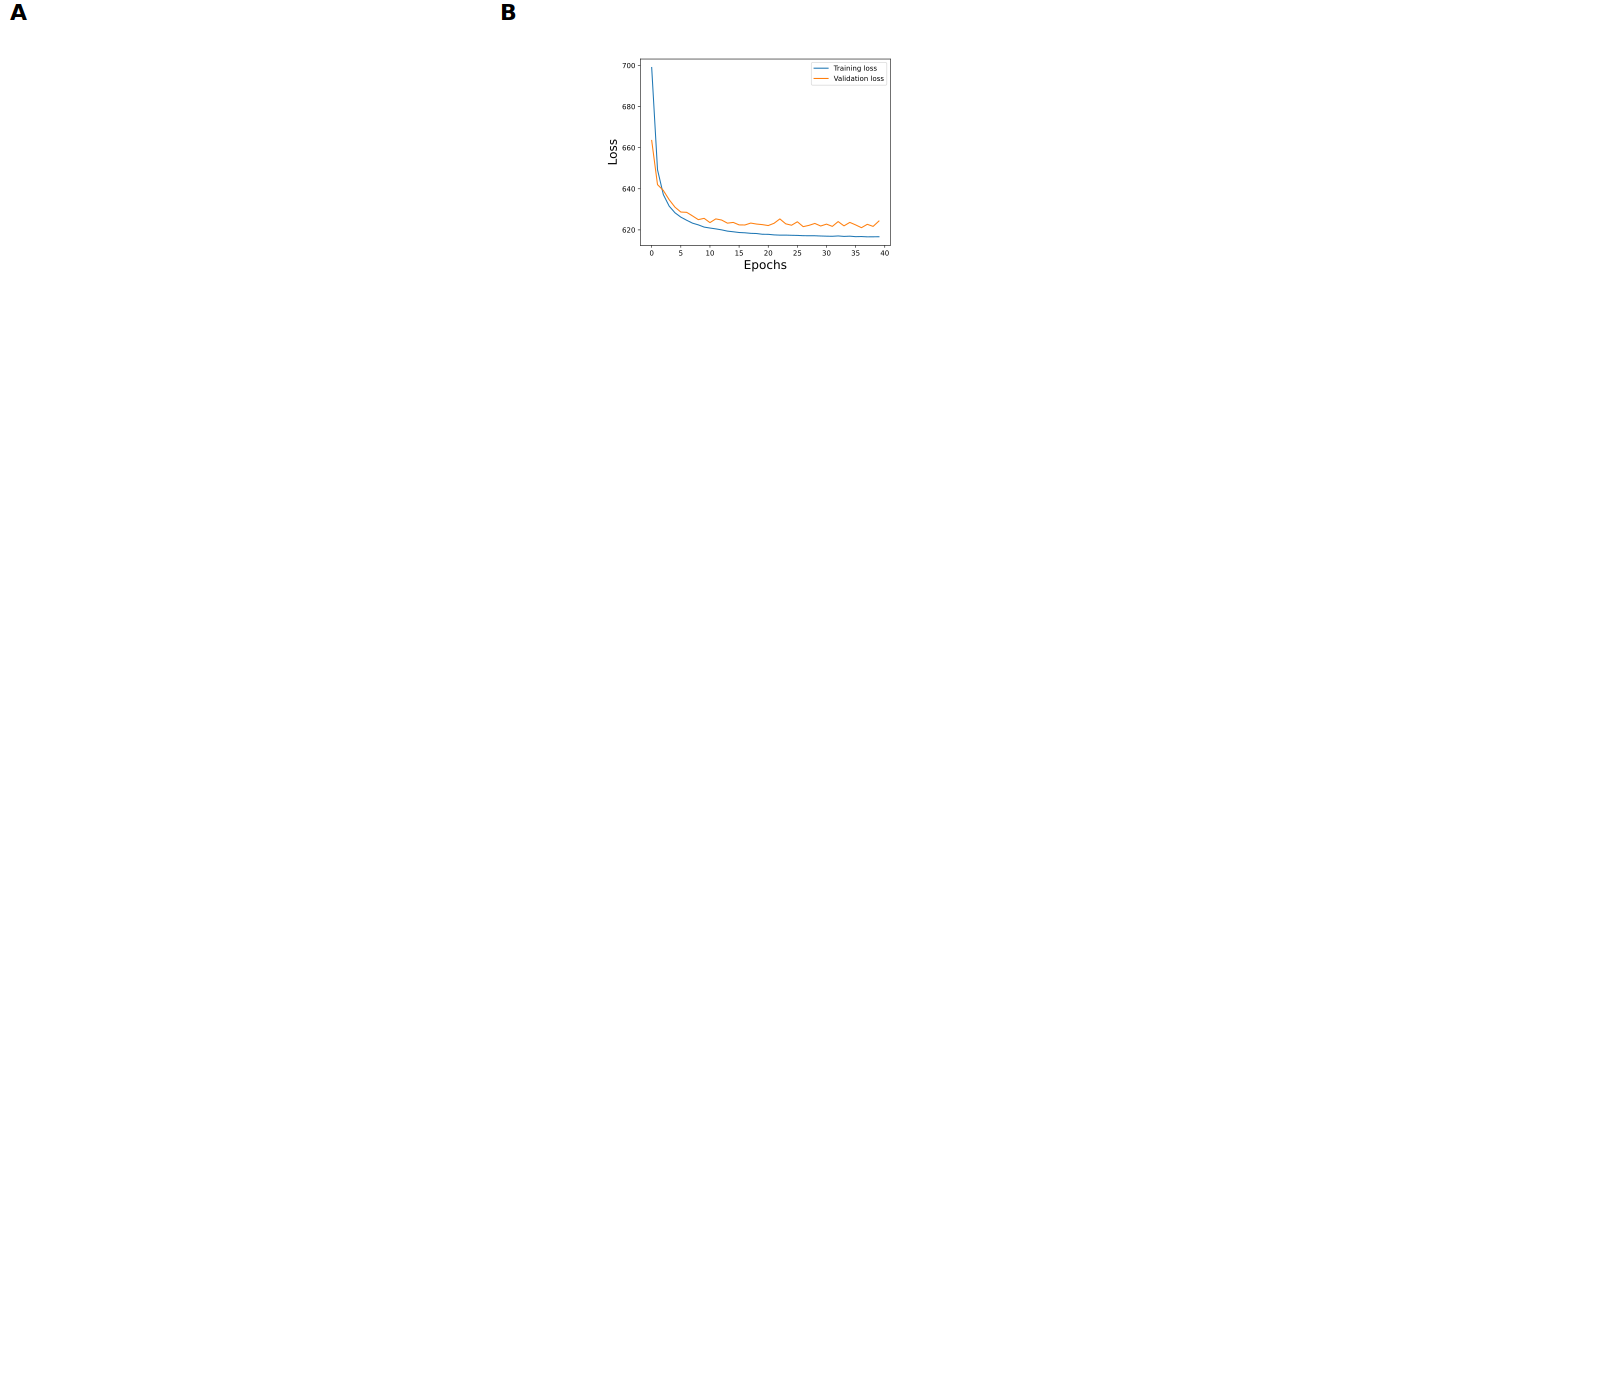

In [6]:
figure_one = sg.SVGFigure("1600", "1400")
figure_one.append([
    etree.Element("rect", {"width":"100%", "height":"100%", "fill":"white"}),
    panel_a, 
    panel_b,
    panel_a_label,
    panel_b_label
])
display(SVG(figure_one.to_str()))